### Разработка концепции ранжирования районов города по уровню самодостаточности на основе больших данных

###### Используемые библиотеки 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

###### Загружаем наши датасеты 

In [2]:
adm2fishnet = pd.read_csv('adm2fishnet.csv',sep=';',low_memory = False)

In [3]:
Clocation1 = pd.read_csv('01_Clocation_202109.csv.gz',low_memory = False)

In [4]:
CDensity2 = pd.read_csv('02_CDensity_202109.csv.gz',low_memory = False)

In [5]:
CMatrix3 = pd.read_csv('03_CMatrix_202109.csv.gz',low_memory = False)

In [6]:
CMatrix4 = pd.read_csv('04_CMatrix_Home_work_202109.csv.gz',low_memory = False)

#### Изучим датасеты

Начнем изучение с adm2fishnet

In [7]:
adm2fishnet

WKT  cell_zid  \
0       MULTIPOLYGON (((38.6495389842383 54.2597139180...         0   
1       MULTIPOLYGON (((38.6549362377517 54.2572466621...         1   
2       MULTIPOLYGON (((38.6625773861122 54.2560891872...         2   
3       MULTIPOLYGON (((38.670279125503 54.25708620909...         3   
4       MULTIPOLYGON (((38.6779821287111 54.2581143832...         4   
...                                                   ...       ...   
203629  MULTIPOLYGON (((37.7014749758556 56.9583390185...    190237   
203630  MULTIPOLYGON (((37.7014595432799 56.9554785760...    190238   
203631  MULTIPOLYGON (((37.7096782769011 56.9554650704...    190239   
203632  MULTIPOLYGON (((37.7178970011675 56.9554510250...    190240   
203633  MULTIPOLYGON (((37.7261157177974 56.9554364396...    190241   

                adm_name okrug_name             sub_ter  
0       Серебряные пруды        NaN  Московская область  
1       Серебряные пруды        NaN  Московская область  
2       Серебряные пруды        NaN  Московская область  
3       Серебряные пруды        NaN  Московская область  
4       Серебряные пруды        NaN  Московская область  
...                  ...        ...                 ...  
203629            Талдом        NaN  Московская область  
203630            Талдом        NaN  Московская область  
203631            Талдом        NaN  Московская область  
203632            Талдом        NaN  Московская область  
203633            Талдом        NaN  Московская область  

[203634 rows x 5 columns]

Названия столбцов на русском языке
- WKT
- идентификатор ячейки
- имя adm название
- округа
- подуровень

Well-known text (WKT) - это язык разметки текста для представления объектов векторной геометрии. Двоичный эквивалент, известный как хорошо известный двоичный код (WKB), используется для передачи и хранения одной и той же информации в более компактной форме, удобной для компьютерной обработки, но не читаемой человеком.

In [8]:
adm2fishnet.shape
# Размер сета 
# 203634 записи-----5 столбцов

(203634, 5)

In [9]:
adm2fishnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203634 entries, 0 to 203633
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   WKT         203634 non-null  object
 1   cell_zid    203634 non-null  int64 
 2   adm_name    203634 non-null  object
 3   okrug_name  14073 non-null   object
 4   sub_ter     203634 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.8+ MB


Посмотрим количество пропусков 

In [10]:
print(adm2fishnet.isna().sum()/len(adm2fishnet)*100)

WKT            0.000000
cell_zid       0.000000
adm_name       0.000000
okrug_name    93.089072
sub_ter        0.000000
dtype: float64


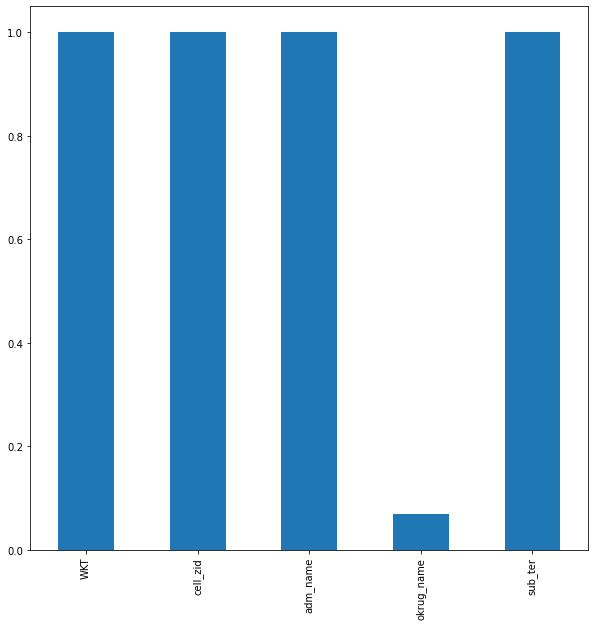

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
(1 - adm2fishnet.isnull().mean()).abs().plot.bar(ax=ax);

Столбец okrug_name имеет 93% пропусков 

In [12]:
adm2fishnet.adm_name.unique()

array(['Серебряные пруды', 'Зарайск', 'Кашира', 'Серпухов', 'Луховицы',
       'Коломна', 'Пущино', 'Ступино', 'Протвино', 'Чехов', 'Егорьевск',
       'Шатура', 'Домодедово', 'Роговское', 'Наро-Фоминск', 'Кленовское',
       'Воскресенск', 'Вороновское', 'Раменское', 'Можайск', 'Подольск',
       'Щаповское', 'Молодежный', 'Киевский', 'Краснопахорское',
       'Новофедоровское', 'Михайлово-Ярцевское', 'Руза', 'Бронницы',
       'Орехово-Зуево', 'Рязановское', 'Первомайское', 'Троицк',
       'Десеновское', 'Одинцово', 'Воскресенское', 'Видное (Ленинский)',
       'Щербинка', 'Южное Бутово', 'Сосенское', 'Жуковский',
       'Филимонковское', 'Марушкинское', 'Северное Бутово', 'Лыткарино',
       'Чертаново Южное', 'Люберцы', 'Бирюлево Западное',
       'Бирюлево Восточное', 'Краснознаменск', 'Московский', 'Кокошкино',
       'Внуково', 'Ясенево', 'Орехово-Борисово Южное', 'Дзержинский',
       'Внуковское', 'Мосрентген', 'Чертаново Центральное', 'Теплый Стан',
       'Орехово-Борисово 

In [13]:
adm2fishnet.okrug_name.unique()

array([nan, 'Троицкий административный округ',
       'Новомосковский административный округ',
       'Юго-Западный административный округ',
       'Южный административный округ', 'Западный административный округ',
       'Юго-Восточный административный округ',
       'Восточный административный округ',
       'Центральный административный округ',
       'Северо-Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Зеленоградский административный округ'], dtype=object)

Пока не будем удалять этот столбец 
- Но с таким количеством пропусков он не несет нам никакой пользы 

###### Столбец WKT

In [14]:
adm2fishnet.WKT

0         MULTIPOLYGON (((38.6495389842383 54.2597139180...
1         MULTIPOLYGON (((38.6549362377517 54.2572466621...
2         MULTIPOLYGON (((38.6625773861122 54.2560891872...
3         MULTIPOLYGON (((38.670279125503 54.25708620909...
4         MULTIPOLYGON (((38.6779821287111 54.2581143832...
                                ...                        
203629    MULTIPOLYGON (((37.7014749758556 56.9583390185...
203630    MULTIPOLYGON (((37.7014595432799 56.9554785760...
203631    MULTIPOLYGON (((37.7096782769011 56.9554650704...
203632    MULTIPOLYGON (((37.7178970011675 56.9554510250...
203633    MULTIPOLYGON (((37.7261157177974 56.9554364396...
Name: WKT, Length: 203634, dtype: object

In [15]:
adm2fishnet.WKT.unique()

array(['MULTIPOLYGON (((38.6495389842383 54.2597139180127,38.6550037336665 54.2596617361031,38.6549362377517 54.2572466621498,38.6547990055632 54.2573151297299,38.6547989843156 54.2573151400193,38.6542226047501 54.2575859062988,38.6542225932158 54.2575859116281,38.6495389842383 54.2597139180127)))',
       'MULTIPOLYGON (((38.6549362377517 54.2572466621498,38.6550037336665 54.2596617361031,38.6626758192106 54.2595879882944,38.6625773861122 54.256089187263,38.6583520567161 54.2555425421106,38.6583517757201 54.2555425894958,38.6549362377517 54.2572466621498)))',
       'MULTIPOLYGON (((38.6625773861122 54.256089187263,38.6626758192106 54.2595879882944,38.6703478711047 54.2595137529146,38.670279125503 54.2570862090965,38.6687577249708 54.2568697147074,38.6687577150164 54.2568697133927,38.6662208806674 54.256560558447,38.6662208733348 54.2565605575259,38.6625773861122 54.256089187263)))',
       ...,
       'MULTIPOLYGON (((37.7096782769011 56.9554650704851,37.7096911926484 56.957765181698

###### Столбец cell_zid

In [16]:
adm2fishnet.cell_zid

0              0
1              1
2              2
3              3
4              4
           ...  
203629    190237
203630    190238
203631    190239
203632    190240
203633    190241
Name: cell_zid, Length: 203634, dtype: int64

###### Столбец adm_name

In [17]:
adm2fishnet.adm_name

0         Серебряные пруды
1         Серебряные пруды
2         Серебряные пруды
3         Серебряные пруды
4         Серебряные пруды
                ...       
203629              Талдом
203630              Талдом
203631              Талдом
203632              Талдом
203633              Талдом
Name: adm_name, Length: 203634, dtype: object

In [18]:
adm2fishnet.adm_name.unique()

array(['Серебряные пруды', 'Зарайск', 'Кашира', 'Серпухов', 'Луховицы',
       'Коломна', 'Пущино', 'Ступино', 'Протвино', 'Чехов', 'Егорьевск',
       'Шатура', 'Домодедово', 'Роговское', 'Наро-Фоминск', 'Кленовское',
       'Воскресенск', 'Вороновское', 'Раменское', 'Можайск', 'Подольск',
       'Щаповское', 'Молодежный', 'Киевский', 'Краснопахорское',
       'Новофедоровское', 'Михайлово-Ярцевское', 'Руза', 'Бронницы',
       'Орехово-Зуево', 'Рязановское', 'Первомайское', 'Троицк',
       'Десеновское', 'Одинцово', 'Воскресенское', 'Видное (Ленинский)',
       'Щербинка', 'Южное Бутово', 'Сосенское', 'Жуковский',
       'Филимонковское', 'Марушкинское', 'Северное Бутово', 'Лыткарино',
       'Чертаново Южное', 'Люберцы', 'Бирюлево Западное',
       'Бирюлево Восточное', 'Краснознаменск', 'Московский', 'Кокошкино',
       'Внуково', 'Ясенево', 'Орехово-Борисово Южное', 'Дзержинский',
       'Внуковское', 'Мосрентген', 'Чертаново Центральное', 'Теплый Стан',
       'Орехово-Борисово 

In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

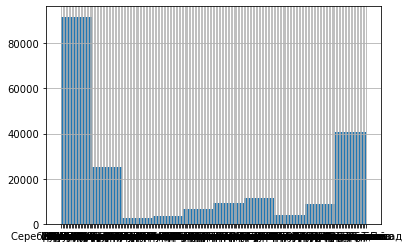

In [20]:
adm2fishnet.adm_name.hist();

###### Столбец sub_ter

In [21]:
adm2fishnet.sub_ter

0         Московская область
1         Московская область
2         Московская область
3         Московская область
4         Московская область
                 ...        
203629    Московская область
203630    Московская область
203631    Московская область
203632    Московская область
203633    Московская область
Name: sub_ter, Length: 203634, dtype: object

In [22]:
adm2fishnet.sub_ter.unique()

array(['Московская область', 'Новая Москва', 'Старая Москва'],
      dtype=object)

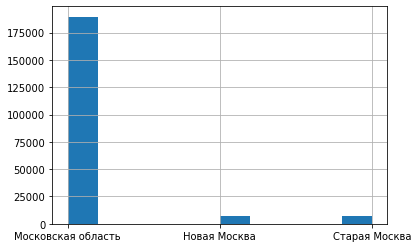

In [23]:
adm2fishnet.sub_ter.hist();

# Clocation1

In [24]:
Clocation1

dt     zid  customers_cnt_home  customers_cnt_job  \
0      2021-09-30   32909                   1                  0   
1      2021-09-30   32910                   2                  0   
2      2021-09-30   33261                   0                  0   
3      2021-09-30   33262                   1                  0   
4      2021-09-30   33263                   0                  0   
...           ...     ...                 ...                ...   
10164  2021-09-30  138913                  14                 28   
10165  2021-09-30  138914                 366               1110   
10166  2021-09-30  138915                 510               1243   
10167  2021-09-30  138916                 183                273   
10168  2021-09-30  139343                 161                 94   

       customers_cnt_day  customers_cnt_night  
0                      0                    3  
1                      0                    4  
2                      0                    2  
3                      0                    5  
4                      0                    4  
...                  ...                  ...  
10164                 35                   52  
10165               1226                  593  
10166               1433                  686  
10167                321                  293  
10168                167                  372  

[10169 rows x 6 columns]

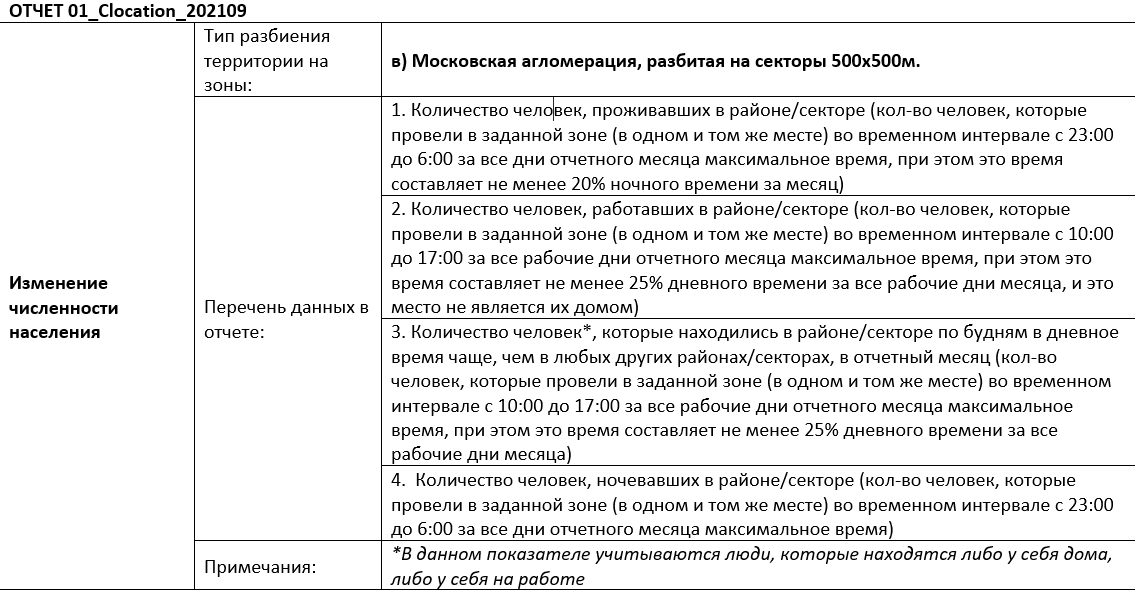

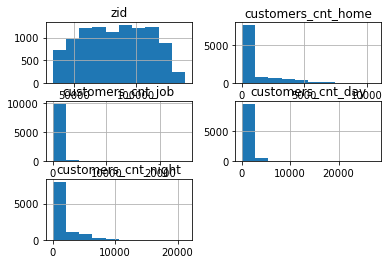

In [25]:
Clocation1.hist();

for i in adm2fishnet.cell_zid:
    print(i)

for i in len(adm2fishnet.cell_zid):
    print(adm2fishnet.cell_zid[i])

# CDensity2

In [26]:
CDensity2

dt  time_interval     zid  median_customers_cnt_total  \
0        2021-09-01              1   32909                         1.0   
1        2021-09-01              1   32910                         1.0   
2        2021-09-01              1   33261                         2.0   
3        2021-09-01              1   33262                         3.0   
4        2021-09-01              1   33264                         1.0   
...             ...            ...     ...                         ...   
1224892  2021-09-30              4  138913                        48.5   
1224893  2021-09-30              4  138914                       491.5   
1224894  2021-09-30              4  138915                       725.5   
1224895  2021-09-30              4  138916                       313.0   
1224896  2021-09-30              4  139343                       247.5   

         median_customers_cnt_long  median_customers_cnt_work  \
0                              1.0                        0.0   
1                              1.0                        0.0   
2                              2.0                        0.0   
3                              3.0                        0.0   
4                              1.0                        0.0   
...                            ...                        ...   
1224892                       41.0                        2.0   
1224893                      392.5                       71.5   
1224894                      588.0                      106.0   
1224895                      240.5                       22.5   
1224896                      173.0                       14.5   

         median_customers_cnt_loc  median_customers_cnt_long_work  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   
...                           ...                             ...   
1224892                       3.0                             1.0   
1224893                      59.5                            60.0   
1224894                      46.0                            91.5   
1224895                      17.0                            21.0   
1224896                      24.0                            11.5   

         median_customers_cnt_long_loc  
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  0.0  
4                                  0.0  
...                                ...  
1224892                            2.0  
1224893                           50.5  
1224894                           35.5  
1224895                           11.0  
1224896                           20.5  

[1224897 rows x 9 columns]

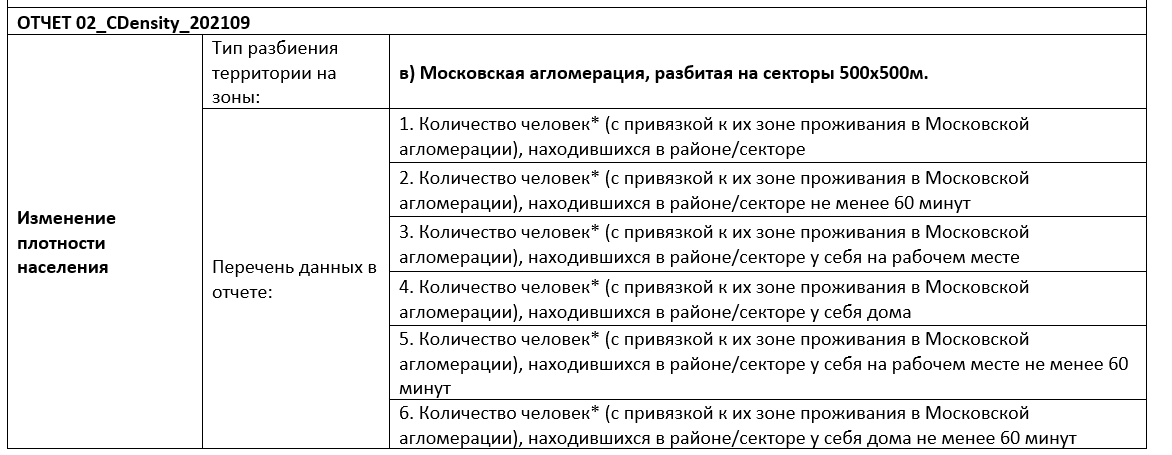

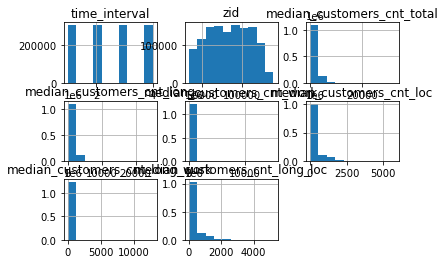

In [27]:
CDensity2.hist();

## CMatrix3

In [28]:
CMatrix3

is_vacation  time_interval  departure_zid  arrival_zid  \
0                   0              1          32909        39217   
1                   0              1          32909       116651   
2                   0              1          32910        37228   
3                   0              1          33261        33261   
4                   0              1          33262        35370   
...               ...            ...            ...          ...   
65062124            1              4         139343       138490   
65062125            1              4         139343       138913   
65062126            1              4         139343       138914   
65062127            1              4         139343       138915   
65062128            1              4         139343       139343   

          median_customers_cnt  median_customers_cnt_metro  \
0                          1.0                         0.0   
1                          1.0                         1.0   
2                          1.0                         0.0   
3                          1.0                         0.0   
4                          1.0                         0.0   
...                        ...                         ...   
65062124                   0.0                         0.0   
65062125                   1.0                         0.0   
65062126                   2.0                         0.0   
65062127                   2.0                         0.0   
65062128                  18.0                         0.0   

          median_customers_cnt_home_work  median_customers_cnt_work_home  
0                                    0.0                             0.0  
1                                    0.0                             0.0  
2                                    0.0                             0.0  
3                                    0.0                             0.0  
4                                    0.0                             0.0  
...                                  ...                             ...  
65062124                             0.0                             0.0  
65062125                             0.0                             0.0  
65062126                             0.0                             0.0  
65062127                             0.0                             0.0  
65062128                             0.0                             0.0  

[65062129 rows x 8 columns]

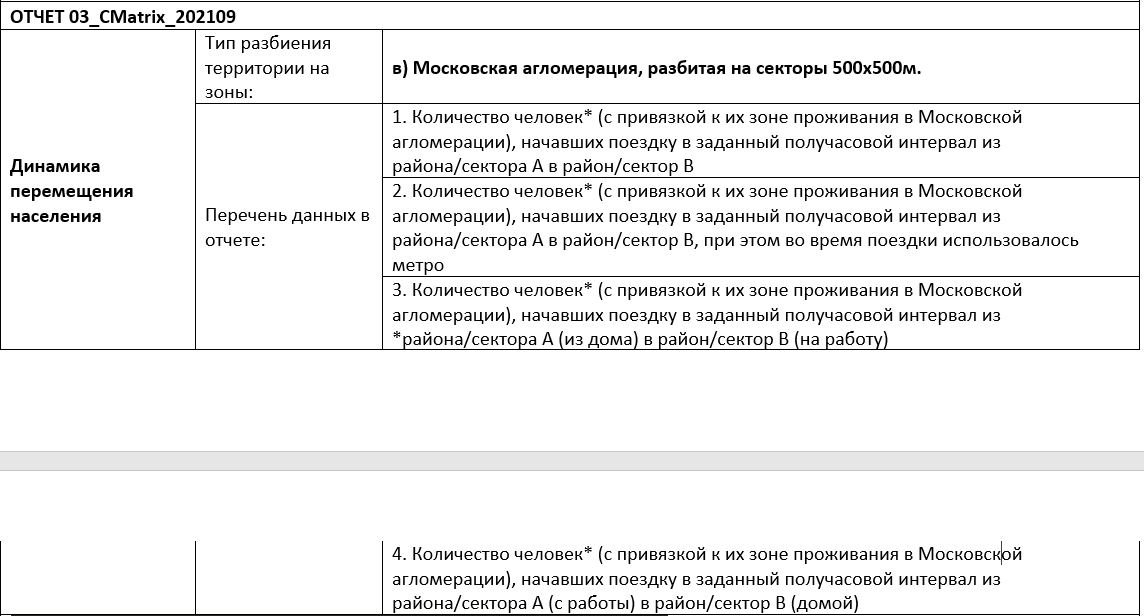

array([[<AxesSubplot:title={'center':'is_vacation'}>,
        <AxesSubplot:title={'center':'time_interval'}>,
        <AxesSubplot:title={'center':'departure_zid'}>],
       [<AxesSubplot:title={'center':'arrival_zid'}>,
        <AxesSubplot:title={'center':'median_customers_cnt'}>,
        <AxesSubplot:title={'center':'median_customers_cnt_metro'}>],
       [<AxesSubplot:title={'center':'median_customers_cnt_home_work'}>,
        <AxesSubplot:title={'center':'median_customers_cnt_work_home'}>,
        <AxesSubplot:>]], dtype=object)

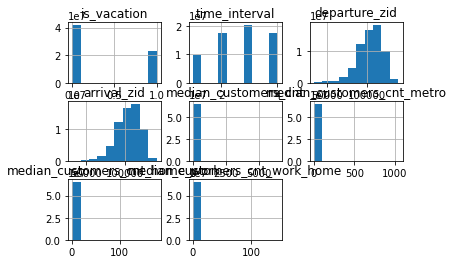

In [29]:
CMatrix3.hist()

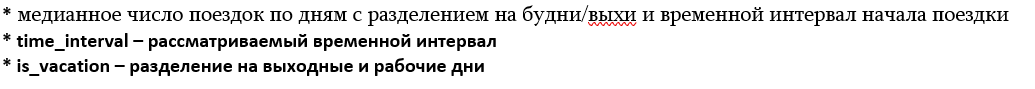

# CMatrix4

In [30]:
CMatrix4

dt  home_zid  work_zid  customers_cnt
0        2021-09-30     32909        -1              1
1        2021-09-30     32910        -1              2
2        2021-09-30     33262     95037              1
3        2021-09-30     33264        -1              2
4        2021-09-30     33614        -1              2
...             ...       ...       ...            ...
1439526  2021-09-30    139343    138488              2
1439527  2021-09-30    139343    138489              1
1439528  2021-09-30    139343    138914              2
1439529  2021-09-30    139343    138915              2
1439530  2021-09-30    139343    139343              1

[1439531 rows x 4 columns]

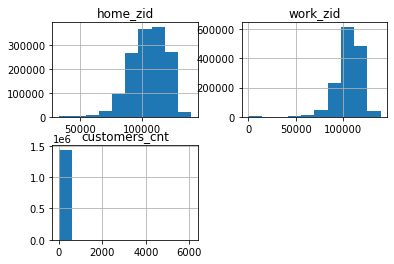

In [31]:
CMatrix4.hist();

In [32]:
from shapely.geometry import MultiPolygon, Polygon

In [33]:
Multi = adm2fishnet.WKT

In [34]:
polygons = []
reserv1 = []
reserv2 = []

In [35]:
for i in Multi:
    a = i.replace("MULTIPOLYGON ","")
    reserv1.append(a)
for i in reserv1:
    a = i.replace(")","")
    reserv2.append(i)
for i in reserv2:
    a = i.replace("(","")
    polygons.append(a)

In [36]:
polygons

['38.6495389842383 54.2597139180127,38.6550037336665 54.2596617361031,38.6549362377517 54.2572466621498,38.6547990055632 54.2573151297299,38.6547989843156 54.2573151400193,38.6542226047501 54.2575859062988,38.6542225932158 54.2575859116281,38.6495389842383 54.2597139180127)))',
 '38.6549362377517 54.2572466621498,38.6550037336665 54.2596617361031,38.6626758192106 54.2595879882944,38.6625773861122 54.256089187263,38.6583520567161 54.2555425421106,38.6583517757201 54.2555425894958,38.6549362377517 54.2572466621498)))',
 '38.6625773861122 54.256089187263,38.6626758192106 54.2595879882944,38.6703478711047 54.2595137529146,38.670279125503 54.2570862090965,38.6687577249708 54.2568697147074,38.6687577150164 54.2568697133927,38.6662208806674 54.256560558447,38.6662208733348 54.2565605575259,38.6625773861122 54.256089187263)))',
 '38.670279125503 54.2570862090965,38.6703478711047 54.2595137529146,38.6780198872483 54.2594390299867,38.6779821287111 54.2581143832596,38.6746957380883 54.25771469022

In [37]:
multipolygon = MultiPolygon([Polygon([(38.6495389842383, 54.2597139180127), (38.6550037336665, 54.2596617361031), (38.6549362377517, 54.2572466621498), (38.6547990055632, 54.2573151297299), (38.6547989843156, 54.2573151400193), (38.6542226047501, 54.2575859062988)]),
                             Polygon([(38.6550037336665, 54.2596617361031), (38.6495389842383, 54.2597139180127), (38.6549362377517, 54.2572466621498)])])

polygons = list(multipolygon)
print(*polygons)

POLYGON ((38.6495389842383 54.2597139180127, 38.6550037336665 54.2596617361031, 38.6549362377517 54.2572466621498, 38.6547990055632 54.2573151297299, 38.6547989843156 54.2573151400193, 38.6542226047501 54.2575859062988, 38.6495389842383 54.2597139180127)) POLYGON ((38.6550037336665 54.2596617361031, 38.6495389842383 54.2597139180127, 38.6549362377517 54.2572466621498, 38.6550037336665 54.2596617361031))


In [38]:
len(polygons)

2

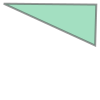

In [39]:
polygons[1]

In [40]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).minimum_clearance

1.0